# Image enchncing in spatial domain

## using image negative

All processing will be done on pixel values. <br>
__s = T(r)__,<br>
where T is gray level transformation function and s is the processed image pixel values and r is the original pixel values.

- Image negative:
__s = (L-1) - r__ <br>
L = number of grey levels.<br><br>

- Thresholding:

    s = L - 1 for r > Threshold<br>
    s = 0 for r < Threshold <br>


- Grey level slicing with background:

 s = L - 1 for a < r < b, where a and b some specific range of grey level<br>
 s = r otherwise
 



In [13]:
import cv2
import numpy as np

# image in grayscale
src = cv2.imread('./img/yoda.jpg',0)

# to get total number of rows and colums of the image
rows, cols = src.shape

# to get the max grey level
L = src.max()

# max grey level value minus the source image provides negative image
img_negative = L - src

cv2.imwrite('./img/yoda_neg.jpg', img_negative)

# Thresholding without background  
# Let threshold =T 
# Let pixel value in the original be denoted by r 
# Let pixel value in the new image be denoted by s 
# If r<T, s= 0 
# If r>T, s=255 

T = 150
img_thresh = np.zeros((rows,  cols), dtype=int)

for i in range(rows):
    for k in range(cols):
        if src[i,k] < T:
            img_thresh[i,k] = 0
        else:
            src[i,k] = 255

cv2.imwrite('./img/yoda_thresh.jpg', img_thresh)

# grey level slicing with background
T1 = 100
T2 = 200

img_thresh_back = np.zeros((rows,cols), dtype=int) 

for i in range(rows):
    for j in range(cols):
        if T1< src[i,j] < T2:
            img_thresh_back[i,j] = 255
        else:
            img_thresh_back[i,j] = src[i,j]
cv2.imwrite('./img/yoda_thresh_back.jpg', img_thresh_back)

True

## using log transformation

- Log transformation : 
    s = c.log(1+r), where c = 255/(log(1+m)), where m = max pixel value, c = scaling constant

In [17]:
from __future__ import division
import cv2 
import numpy as np 
  
# Open the image. 
img = cv2.imread('./img/yoda.jpg') 
  
# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
# Save the output. 
cv2.imwrite('./img/yoda_log_transformed.jpg', log_transformed) 


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


True

### warning handling technique: use log1p()

In [1]:
from __future__ import division
import cv2 
import numpy as np 
  
# Open the image. 
img = cv2.imread('./img/yoda.jpg') 
  
# Apply log transform. 
c = 255/(np.log1p(np.max(img)))
log_transformed = c * np.log1p(img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
# Save the output. 
cv2.imwrite('./img/yoda_log_transformed.jpg', log_transformed) 



True

## using power-law transformation

In [20]:
import cv2
import numpy as np

src = cv2.imread('./img/mri_bone.jpg')

# checking for different gamma values
gamma_val = [0.1, 0.25, 1.5, 2.3]
for gamma in gamma_val:
    gamma_corrected = np.array(255*(src/255)**gamma, dtype='uint8')
    
    # Save edited images. 
    cv2.imwrite('./img/gamma_transformed'+str(gamma)+'.jpg', gamma_corrected) 



## piecewise-linear transformation

As the name suggests, the function is not completly linear, its liners between certain x intervals.<br>

C = (I_max - I_min)/(I_max + I_min), where C is contrast<br>


<img src='linear.png' width=300 height=300>

In [23]:
import cv2
import numpy as np

# function to map intensity level
def pixelValueMap(pixVal, r1, s1, r2, s2):
    
    if (0 <= pixVal and pixVal <= r1):
        return (s1/s2)*pixVal
    
    elif (r1 <= pixVal and pixVal <= r2):
        return ((s2 - s1)/(r2 - r1))*(pixVal - r1) + s1
    
    else:
        return ((255 - s2)/(255 - r2))*(pixVal - r2) + s2

src_img = cv2.imread('./img/mri_bone.jpg')

# parameters
r1 = 70
s1 = 20
r2 = 200
s2 = 255

# vectorize the function to apply it on each pixel value in ndarray
pixelValue_vec = np.vectorize(pixelValueMap) 

# contranst stretching
constrast_stretched = pixelValue_vec(src_img, r1, s1, r2, s2)

cv2.imwrite('./img/mri_liner.jpg', constrast_stretched)

True

# Enhancing image using histogram equalization method

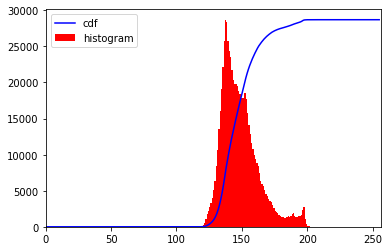

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src_img = cv2.imread('./img/wiki.jpg', 0)

hist,bins = np.histogram(src_img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(src_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

We can see histogram lies in brighter region. We need the full spectrum. For that, we need a transformation function which maps the input pixels in brighter region to output pixels in full region. That is what histogram equalization does.

Now we find the minimum histogram value (excluding 0) and apply the histogram equalization equation as given in wiki page. But I have used here, the masked array concept array from Numpy. For masked array, all operations are performed on non-masked elements.

In [25]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [27]:
img2=cdf[src_img]

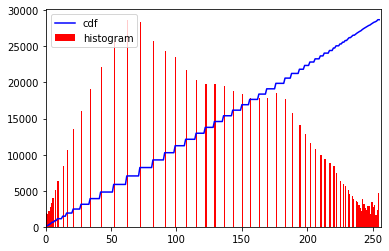

In [29]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### using openCV

In [32]:
import cv2

img = cv2.imread('./img/wiki.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('./img/res.png',res)

True